<img src="https://github.com/superlin30/NLP-with-Python/blob/main/logo.png" width=45%>

# <center>Chapter 3 经典文本向量化方法</center>

**除去数据搜集和数据清洗，要完成各种NLP任务，首先就是要让计算机能够处理输入的文本，换而言之，就是将文本进行编码，使其转化为计算机能够进行计算的向量形式。**
###  本章节基本组织如下:
* one-hot
* TF-IDF
* 基于语料库的词典方法

## 1.one-hot

**One-Hot编码将文本作为二进制向量的表示。这首先要求将文本分词。然后，每个单词被表示为二进制，若文本中出现该单词，被标记为1，不出现则为0。**

<img src="https://img1.baidu.com/it/u=1428363562,4281757533&fm=253&fmt=auto&app=138&f=PNG?w=500&h=202">

In [1]:
import numpy as np
import jieba 
# 对中文而言，第一步要得到分词后的语料
text = "利用代码实现这个方法"   
words = jieba.lcut(text)  
print(f"分词后: {words}") 

# 第二步为构建一个词典
word_dict = {word: index for index,word in enumerate(words)} #enumerate:对于一个可迭代对象，同时返回索引和值
print(f"词典(语料库): {word_dict}") 

# 第三步骤为生成全0向量
one_hot = [0 for _ in range(len(word_dict))]   # 生成一个全0的向量，维度为词典的维度
print(f"全0的向量: {one_hot}") 

# 假设要生成"代码"这个词的one_hot向量
one_hot[word_dict["代码"]] = 1    #将单词的对应索引的值设为1
print(f"'代码'对应的one-hot向量: {one_hot}") 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\PC\AppData\Local\Temp\jieba.cache
Loading model cost 0.664 seconds.
Prefix dict has been built successfully.


分词后: ['利用', '代码', '实现', '这个', '方法']
词典(语料库): {'利用': 0, '代码': 1, '实现': 2, '这个': 3, '方法': 4}
全0的向量: [0, 0, 0, 0, 0]
'代码'对应的one-hot向量: [0, 1, 0, 0, 0]


**可调用sklearn库进行文本onehot处理**

<AxesSubplot:>

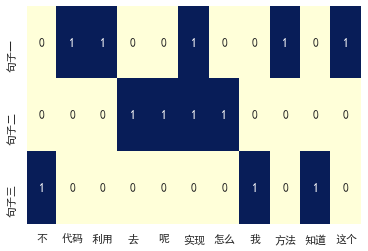

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns 
sns.set(font="simhei")  #设置中文字体，不然作图出现乱码

corpus = ['利用代码实现这个方法','怎么去实现呢','我不知道']   #给定三个句子作为语料库
for index,text in enumerate(corpus):       # enumerate方法：同时返回索引和值
    corpus[index] = jieba.lcut(text)       # 将语料库中句子进行分词
    corpus[index] = ' '.join(corpus[index])   # 将分词之间用空格连接起来

print(corpus)
    
one_hot_encoder = CountVectorizer(binary = True,token_pattern='[\u4e00-\u9fa5_a-zA-Z0-9]{1,}') 
#调用sklearn的CountVectorizer()，用正则设置token_pattern，避免无法识别中文单字 
one_hot = one_hot_encoder.fit_transform(corpus).toarray()  # one_hot向量
label_name = one_hot_encoder.get_feature_names()           # one_hot值对应的label（单词）
sns.heatmap(one_hot,annot = True,cbar = False,xticklabels=label_name,yticklabels=['句子一','句子二','句子三'],cmap="YlGnBu")

**也可使用kreas库的`keras.preprocessing.text`进行文本onehot处理**

## 2.TF-IDF

**TF-IDF（Term Frequency/Inverse Document Frequency）是信息检索领域非常重要的搜索词重要性度量；用以衡量一个关键词w对于查询（Query，可看作文档）所能提供的信息**

(1)计算词频TF = n/N，n表示某个词在文档中出现的次数，N表示文档中所有词出现的次数总和。 <p>
(2)计算逆文档频率IDF = log(D/d),D表示语料中所有的文档总数，d表示语料中出现某个词的文档数量。 <p>
(2)最终值为两者的乘积：TF*IDF

**调用sklearn库进行TFIDF计算**

<AxesSubplot:>

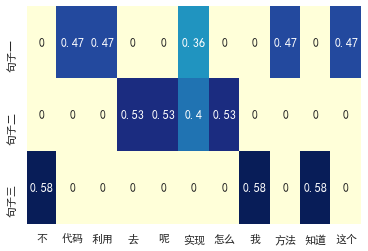

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['利用代码实现这个方法','怎么去实现呢','我不知道']  #语料库

for index,text in enumerate(corpus):
    corpus[index] = jieba.lcut(text)
    corpus[index] = ' '.join(corpus[index])
    
Tfidf_encoder = TfidfVectorizer(token_pattern='[\u4e00-\u9fa5_a-zA-Z0-9]{1,}') #调用sklearn的TfidfVectorizer()  
Tfidf = Tfidf_encoder.fit_transform(corpus).toarray()               #得到tfidf值
label_name = Tfidf_encoder.get_feature_names()                      #值对应的label（单词）
sns.heatmap(Tfidf,annot = True,cbar = False,xticklabels=label_name,yticklabels=['句子一','句子二','句子三'],cmap="YlGnBu")

**调用jieba库，根据TFIDF抽取文档关键词**

In [79]:
with open('Tfidf_example.txt', 'r',encoding='utf-8') as text_file:   # 读取txt文件
    example = text_file.read()
print(example)

上月，欧洲央行完成了近11年来的首次加息，并超预期加息50个基点，抑制通胀同时追赶美联储加息脚步。相较于美联储，欧洲央行的加息周期显然开始较晚，但该行的谨慎并非无的放矢，债务风险是欧洲央行加息路上的一大障碍。当前，欧元区政府债务和财政赤字压力并不弱于2010年欧债危机爆发前夕。疫情下为配合财政刺激，欧盟阶段性摆脱了财政束缚，使得成员国政府债务率和财政赤字率显著上升，继而中期债务风险上升，其中希腊、意大利等债务压力相对更大。而欧洲央行的货币紧缩可能使成员国政府债务风险进一步扩大。在低通胀、低利率时期，欧洲央行可以通过大量增持“高债国”债券兜底。但眼下，“类滞胀”格局迫使欧洲央行进入紧缩周期，目前该行已宣布停止资产购买计划、结束扩表。在此背景下，欧债危机会重现吗？考虑到这一问题，欧洲央行颁布了新的应对措施：一方面，将灵活运用大流行紧急购买计划（PEPP）中的再投资额度；另一方面，推出传导保护工具（TPI），目的是“保障其货币政策立场在整个欧元区的顺利传输”。欧洲央行行长拉加德表示，TPI将允许央行在二级市场上购买国债，购买规模取决于传导风险，重点购买1至10年期的公共部门证券，也会考虑购买私营部门债券。不过，平安证券首席经济学家钟正生认为，欧洲央行新工具的实际运作和效果仍待观察。首先，由于受制于控通胀目标，欧洲央行很难大规模购买资产、大幅扩表。虽然欧洲央行没有给出TPI的规模上限，但预计实际操作规模有限。其次，如何判定干预市场的时机和程度，料将会有争议。过早干预市场或受德国方面的阻力，而过晚干预市场或难起到预期效果。此外，还需要防止成员国对欧洲央行救助措施的过度依赖，这或也意味着欧洲央行行动的果断性将受到制约。最后，若欧元区经济受到更大冲击，成员国财政可持续性受到挑战，新工具的判定或有争议，“预期引导”仍有失效的可能。


In [80]:
import jieba.analyse
print(jieba.analyse.extract_tags(example, topK=5, withWeight=True))
# topK 为返回几个 TF/IDF 权重最大的关键词，withWeight 为是否一并返回关键词权重值

[('欧洲央行', 0.4188328159991984), ('购买', 0.15350847079816793), ('债务', 0.1468613104703817), ('TPI', 0.13688665079656487), ('加息', 0.11997822456431298)]


* 当一个词在文档频率越高并且新鲜度高（即普遍度低），其TF-IDF值越高。
* TF-IDF兼顾词频与新鲜度，过滤一些常见词(例如“的，得，了”)，保留能提供更多信息的关键词。

## 3.基于语料库的词典方法

**基于语料库将文本编码成一个个数字id，使计算机可以进行处理，这样就得到了一个 词（字）与数字 一一对应的计算机“词典”**

In [1]:
#在one-hot方法第二步我们已经生成了输入文本的词典，将其打包成一个函数如下：
def preprocess(text):
    words = jieba.lcut(text)  #分词
    
    word_to_id = {}
    for index,word in enumerate(words):
        word_to_id[word] = index         #词到id的字典
    
    id_to_word = {index: word for index,word in enumerate(words)}   #id到词的字典，此代码为上面词到id的字典的简写形式
    
    text_id = np.array([word_to_id[word] for word in words])
    return word_to_id,id_to_word,text_id

In [86]:
text = "首先，由于受制于控通胀目标，欧洲央行很难大规模购买资产、大幅扩表"
word_to_id,id_to_word,text_id = preprocess(text)
print(f"词到id的字典: {word_to_id}",end='\n\n')
print(f"id到词的字典: {id_to_word}",end='\n\n')
print(f"将输入文本转化为id形式: {text_id}")

词到id的字典: {'首先': 0, '，': 7, '由于': 2, '受制于': 3, '控': 4, '通胀': 5, '目标': 6, '欧洲央行': 8, '很难': 9, '大规模': 10, '购买': 11, '资产': 12, '、': 13, '大幅': 14, '扩表': 15}

d到词的字典: {0: '首先', 1: '，', 2: '由于', 3: '受制于', 4: '控', 5: '通胀', 6: '目标', 7: '，', 8: '欧洲央行', 9: '很难', 10: '大规模', 11: '购买', 12: '资产', 13: '、', 14: '大幅', 15: '扩表'}

将输入文本转化为id形式: [ 0  7  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
